In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlinefleet/Fleet Data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fleet = pd.read_csv('/kaggle/input/airlinefleet/Fleet Data.csv')

In [5]:
fleet.head(10)

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3
5,Aegean Airlines,Olympic Air,ATR 42/72,2.0,NaN,NaN,2.0,NaN,$22,$44,2.4
6,Aegean Airlines,Aegean Airlines,ATR 42/72,NaN,NaN,6.0,6.0,NaN,$22,$0,NaN
7,Aegean Airlines,Aegean Airlines,Boeing 737,NaN,NaN,17.0,17.0,NaN,$74,$0,NaN
8,Aegean Airlines,Aegean Airlines,British Aerospace BAe 146/Avro RJ,NaN,NaN,6.0,6.0,NaN,$14,$0,NaN
9,Aegean Airlines,Olympic Air,De Havilland Canada DHC-8 Dash 8,12.0,NaN,7.0,19.0,NaN,$31,$376,12.6


In [6]:
fleet.tail(10)

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
1573,Virgin Australia,Virgin Australia Regional,Fokker F70 / F100,14.0,NaN,NaN,14.0,NaN,$20,$280,24.6
1574,Volaris,Volaris,Airbus A319,15.0,NaN,9.0,24.0,NaN,$90,"$1,344",9.7
1575,Volaris,Volaris,Airbus A320,44.0,3.0,1.0,48.0,42.0,$98,"$4,312",3.3
1576,Volaris,Volaris,Airbus A321,9.0,1.0,NaN,10.0,NaN,$115,"$1,034",0.6
1577,WestJet,WestJet,Boeing 737,114.0,1.0,40.0,155.0,NaN,$74,"$8,434",8.3
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,$73,$0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,$187,$748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,$31,"$1,033",2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,$98,"$6,174",5.1
1582,Wizz Air,Wizz Air,Airbus A321,11.0,4.0,NaN,15.0,129.0,$115,"$1,264",0.6


In [7]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   object 
 9   Total Cost (Current)  1556 non-null   object 
 10  Average Age           820 non-null    float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


In [10]:
fleet_clean = fleet.dropna()

In [11]:
fleet_clean

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
14,Aeroflot,Aeroflot,Airbus A320,71.0,1.0,3.0,75.0,11.0,$98,"$6,958",5.7
22,Aeroflot,Aeroflot,Boeing 737,20.0,1.0,16.0,37.0,26.0,$74,"$1,480",1.6
30,Aeroflot,Rossiya Airlines,Boeing 777,6.0,5.0,1.0,12.0,5.0,$295,"$1,767",17.7
66,Air Algerie,Air Algerie,Boeing 737,31.0,1.0,38.0,70.0,2.0,$74,"$2,293",8.6
89,Air Berlin,Air Berlin,Airbus A330,15.0,2.0,3.0,20.0,2.0,$240,"$3,600",13.1
...,...,...,...,...,...,...,...,...,...,...,...
1492,Turkish Airlines,Turkish Airlines,Boeing 777,32.0,1.0,6.0,39.0,2.0,$295,"$9,426",3.2
1503,United Airlines,United Airlines,Boeing 737,321.0,2.0,295.0,620.0,103.0,$74,"$23,748",10.1
1507,United Airlines,United Airlines,Boeing 777,74.0,14.0,8.0,96.0,14.0,$295,"$21,797",17.5
1535,Vietnam Airlines,Jetstar Pacific Airlines,Airbus A320,13.0,1.0,4.0,18.0,10.0,$98,"$1,274",7.0


In [12]:
# Remove duplicate rows based on all columns
fleet_clean_unique = fleet_clean.drop_duplicates()

In [13]:
fleet_clean_unique

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
14,Aeroflot,Aeroflot,Airbus A320,71.0,1.0,3.0,75.0,11.0,$98,"$6,958",5.7
22,Aeroflot,Aeroflot,Boeing 737,20.0,1.0,16.0,37.0,26.0,$74,"$1,480",1.6
30,Aeroflot,Rossiya Airlines,Boeing 777,6.0,5.0,1.0,12.0,5.0,$295,"$1,767",17.7
66,Air Algerie,Air Algerie,Boeing 737,31.0,1.0,38.0,70.0,2.0,$74,"$2,293",8.6
89,Air Berlin,Air Berlin,Airbus A330,15.0,2.0,3.0,20.0,2.0,$240,"$3,600",13.1
...,...,...,...,...,...,...,...,...,...,...,...
1492,Turkish Airlines,Turkish Airlines,Boeing 777,32.0,1.0,6.0,39.0,2.0,$295,"$9,426",3.2
1503,United Airlines,United Airlines,Boeing 737,321.0,2.0,295.0,620.0,103.0,$74,"$23,748",10.1
1507,United Airlines,United Airlines,Boeing 777,74.0,14.0,8.0,96.0,14.0,$295,"$21,797",17.5
1535,Vietnam Airlines,Jetstar Pacific Airlines,Airbus A320,13.0,1.0,4.0,18.0,10.0,$98,"$1,274",7.0


In [14]:
fleet_clean_unique.shape

(65, 11)

In [15]:
fleet_clean_unique.describe()

,Current,Future,Historic,Total,Orders,Average Age
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,75.323077,3.692308,25.446154,104.507692,51.276923,7.824615
std,108.816805,5.074209,46.041093,150.343474,72.440602,4.666906
min,2.000000,1.000000,1.000000,8.000000,2.000000,0.100000
25%,18.000000,1.000000,4.000000,33.000000,7.000000,4.900000
50%,40.000000,2.000000,10.000000,50.000000,26.000000,7.000000
75%,93.000000,4.000000,24.000000,115.000000,61.000000,9.600000
max,718.000000,38.000000,295.000000,952.000000,400.000000,21.200000


In [22]:
fleet_clean_unique.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [23]:
fleet_clean_unique['Parent Airline'].value_counts()

Series([], Name: count, dtype: int64)

In [24]:
fleet_clean_unique['Airline'].value_counts()

Airline
Turkish Airlines                   3
Aeroflot                           2
Air India                          2
Korean Air                         2
Qatar Airways                      2
Saudi Arabian Airlines             2
All Nippon Airways                 2
China Eastern Airlines             2
Air China                          2
United Airlines                    2
Spring Airlines                    1
Eurowings                          1
Japan Transocean Air (72.8%)       1
Jet2                               1
Jetstar Pacific Airlines           1
LATAM Airlines Brazil              1
Lion Air                           1
Brussels Airlines                  1
Lufthansa                          1
Pakistan International Airlines    1
Oman Air                           1
Thomas Cook Airlines               1
Pegasus Airlines                   1
RyanAir                            1
IndiGo                             1
South African Airways              1
Southwest Airlines            

In [25]:
fleet_clean_unique['Aircraft Type'].value_counts()

Aircraft Type
Airbus A320                         24
Boeing 737                          19
Boeing 777                           6
Airbus A330                          6
Airbus A321                          4
Boeing 787 Dreamliner                1
De Havilland Canada DHC-8 Dash 8     1
Boeing 717                           1
Boeing 747                           1
Airbus A319                          1
Boeing 757                           1
Name: count, dtype: int64

In [26]:
fleet_clean_unique['Current'].value_counts()

Current
28.0     2
10.0     2
13.0     2
21.0     2
66.0     2
29.0     2
8.0      2
2.0      2
35.0     2
15.0     2
718.0    1
108.0    1
124.0    1
45.0     1
74.0     1
50.0     1
34.0     1
48.0     1
73.0     1
321.0    1
366.0    1
11.0     1
17.0     1
32.0     1
14.0     1
58.0     1
65.0     1
16.0     1
93.0     1
71.0     1
18.0     1
22.0     1
6.0      1
31.0     1
43.0     1
144.0    1
98.0     1
3.0      1
26.0     1
157.0    1
282.0    1
40.0     1
165.0    1
126.0    1
125.0    1
123.0    1
76.0     1
154.0    1
101.0    1
159.0    1
30.0     1
55.0     1
56.0     1
20.0     1
44.0     1
Name: count, dtype: int64

In [27]:
fleet_clean_unique['Total'].value_counts()

Total
75.0     3
36.0     3
42.0     2
15.0     2
173.0    2
27.0     2
23.0     2
50.0     2
18.0     2
45.0     2
131.0    1
14.0     1
81.0     1
93.0     1
29.0     1
53.0     1
88.0     1
476.0    1
46.0     1
150.0    1
49.0     1
952.0    1
77.0     1
26.0     1
72.0     1
39.0     1
620.0    1
96.0     1
71.0     1
91.0     1
134.0    1
44.0     1
12.0     1
70.0     1
20.0     1
220.0    1
115.0    1
8.0      1
198.0    1
11.0     1
332.0    1
33.0     1
21.0     1
40.0     1
191.0    1
145.0    1
110.0    1
269.0    1
128.0    1
174.0    1
37.0     1
60.0     1
48.0     1
Name: count, dtype: int64

In [28]:
fleet_clean_unique['Orders'].value_counts()

Orders
2.0      7
14.0     5
4.0      4
3.0      3
10.0     2
33.0     2
7.0      2
25.0     2
11.0     1
27.0     1
32.0     1
400.0    1
40.0     1
204.0    1
77.0     1
30.0     1
52.0     1
59.0     1
16.0     1
205.0    1
284.0    1
63.0     1
94.0     1
8.0      1
103.0    1
24.0     1
6.0      1
78.0     1
121.0    1
5.0      1
49.0     1
70.0     1
36.0     1
21.0     1
57.0     1
28.0     1
111.0    1
26.0     1
61.0     1
130.0    1
41.0     1
65.0     1
56.0     1
165.0    1
177.0    1
42.0     1
Name: count, dtype: int64

In [31]:
fleet_clean_unique['Unit Cost'].value_counts()

Unit Cost
$98     24
$74     19
$295     6
$240     6
$115     4
$265     1
$31      1
$37      1
$316     1
$90      1
$73      1
Name: count, dtype: int64

In [30]:
fleet_clean_unique['Total Cost (Current)'].value_counts()

Series([], Name: count, dtype: int64)

In [29]:
fleet_clean_unique['Average Age'].value_counts()

Average Age
5.7     2
9.6     2
2.1     2
6.4     2
5.3     2
7.5     2
7.7     2
6.6     2
4.6     2
10.0    2
17.7    2
18.8    1
10.8    1
5.1     1
16.6    1
12.6    1
9.3     1
1.3     1
7.4     1
10.9    1
5.2     1
6.1     1
4.2     1
11.7    1
3.7     1
15.7    1
3.2     1
10.1    1
17.5    1
7.0     1
8.5     1
5.5     1
7.2     1
15.3    1
8.6     1
13.1    1
4.7     1
0.5     1
9.0     1
21.2    1
0.1     1
5.0     1
2.5     1
8.9     1
6.8     1
4.9     1
7.3     1
6.3     1
9.2     1
3.6     1
8.1     1
3.8     1
1.6     1
3.3     1
Name: count, dtype: int64

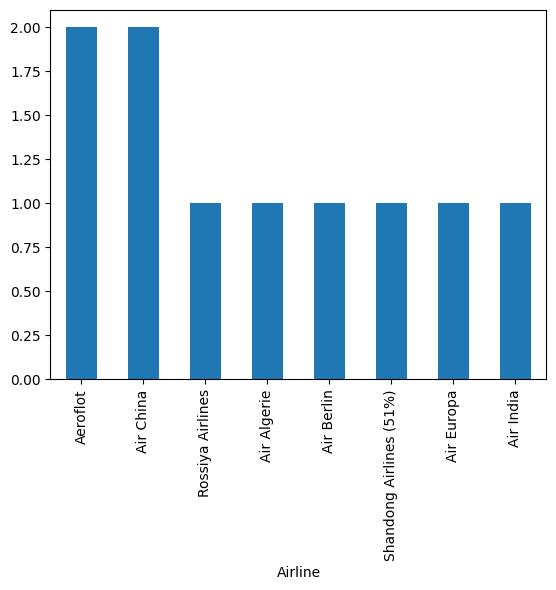

In [39]:
fleet_clean_unique['Airline'].head(10).value_counts().plot(kind='bar')
plt.show()

Aeroflot and Air China are the most choice

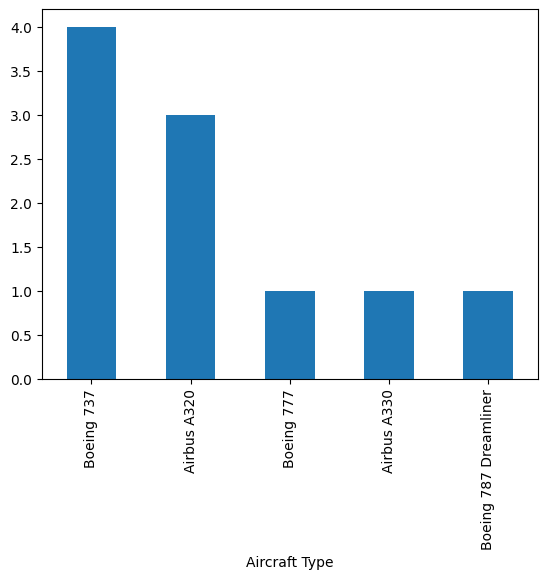

In [48]:
fleet_clean_unique['Aircraft Type'].head(10).value_counts().plot(kind='bar')
plt.show()

Airlines worldwide predominantly select the Boeing 737 and Airbus A320 for their fleets.

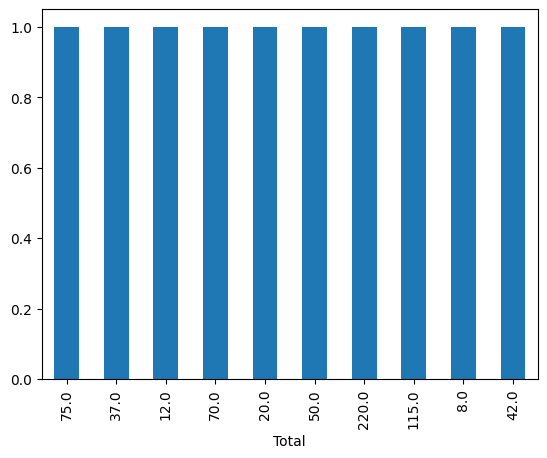

In [40]:
fleet_clean_unique['Total'].head(10).value_counts().plot(kind='bar')
plt.show()

In total section frequently has same trends

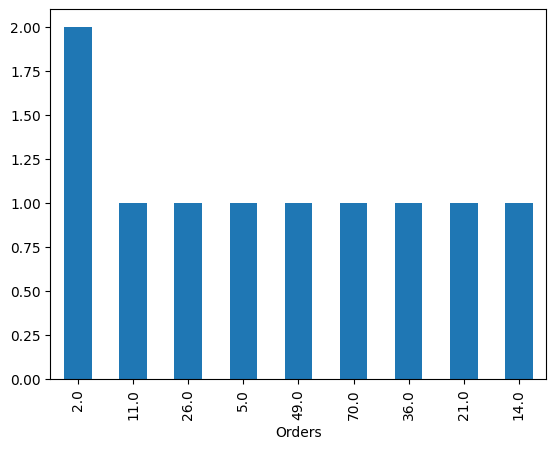

In [42]:
fleet_clean_unique['Orders'].head(10).value_counts().plot(kind='bar')
plt.show()

Orders in 2.0 is the higher trends 

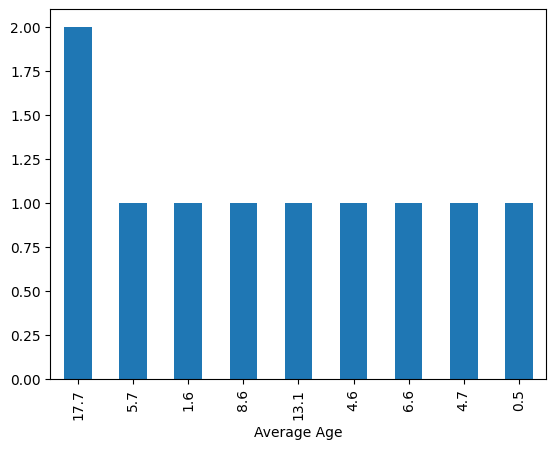

In [47]:
fleet_clean_unique['Average Age'].head(10).value_counts().plot(kind='bar')
plt.show()

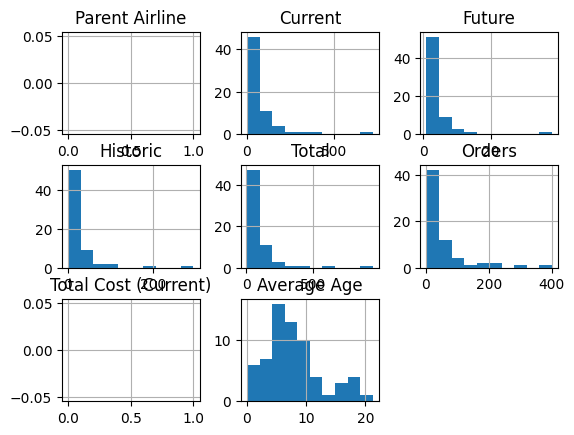

In [46]:
# histograms
fleet_clean_unique.hist()
plt.show()